# Regression Model for Life Expectancy Prediction

In this project, I focus on predicting life expectancy in different countries across various years. The goal is to build a regression model that uses multiple features related to healthcare, socio-economic factors, and demographics to predict the life expectancy of a country in a given year.

## Dataset overview

I work with two datasets: `data.csv` for training the model and `evaluation.csv` for evaluating its performance.

#### Features:

* **Year** – The year the data corresponds to
* **Status** – Whether the country is a developed or developing country
* **Life expectancy** – The target variable I aim to predict, representing the life expectancy in years
* **Adult Mortality** – Probability of adults aged 15-60 dying (per 1,000 people)
* **Infant deaths** – Number of infant deaths per 1,000 people
* **Alcohol** – Recorded alcohol consumption per capita (15+ years old) in liters of pure alcohol
* **Percentage expenditure** – Healthcare expenditure as a percentage of GDP per capita
* **Hepatitis B** – Percentage of 1-year-olds vaccinated against Hepatitis B
* **Measles** – Number of reported measles cases per 1,000 people
* **BMI** – Average body mass index of the population
* **Under-five deaths** – Number of deaths of children under five per 1,000 people
* **Polio** – Percentage of 1-year-olds vaccinated against polio
* **Total expenditure** – Government healthcare expenditure as a percentage of total government expenditure
* **Diphtheria** – Percentage of 1-year-olds vaccinated against diphtheria, tetanus, and pertussis
* **HIV/AIDS** – Number of deaths from HIV/AIDS per 1,000 live births (age 0-4)
* **GDP** – Gross domestic product per capita (USD)
* **Population** – The population of the country
* **Thinness 1-19 years** – Percentage of children aged 10-19 years with BMI below 2 standard deviations from the median
* **Thinness 5-9 years** – Percentage of children aged 5-9 years with BMI below 2 standard deviations from the median
* **Income composition of resources** – Human development index based on income composition (0 to 1)
* **Schooling** – Number of years of schooling

## Project steps

### 1. Data loading and preprocessing
- Load the training data from `data.csv` and split it into subsets: training, validation, and testing.
- Preprocess the data by transforming the features into a suitable form for regression. Handle any missing values appropriately, and explore the possibility of feature engineering (e.g., creating new features from existing ones).

### 2. Exploratory data analysis
- Conduct some basic data analysis and visualizations to better understand the relationships between features and the target variable (`Life expectancy`).
- Comment on any interesting patterns, trends, or anomalies observed during this stage.

### 3. Model building
- Implement a **Random Forest** regression model from scratch.
- Apply various regression models, including:
  - My custom Random Forest implementation
  - Linear Regression or Ridge Regression
  - A third model of my choice (e.g., Decision Trees, Support Vector Regression, etc.)
- For each model, experiment with normalizing (standardizing or min-max scaling) the data if necessary.
- Tune the hyperparameters for each model, focusing on minimizing **RMSE** (Root Mean Squared Error).
- For the best-performing model, compute the **RMSE** and **MAE** (Mean Absolute Error).

### 4. Model evaluation
- After testing multiple models, select the best one based on performance (lowest error).
- Estimate how the final model would perform on unseen data.

### 5. Prediction and results
- Load the evaluation data from `evaluation.csv`.
- Use the final selected model to predict the life expectancy for the countries and years in the evaluation set.
- Save the results in a `results.csv` file.


### Conclusion and future work
- Reflect on the model's performance and the importance of the chosen features.
- Consider potential improvements, such as adding more features or fine-tuning the models further.

In [1]:
# Custom Random Forest implementation

import numpy as np
from sklearn.tree import DecisionTreeRegressor
from sklearn.base import BaseEstimator, RegressorMixin

class CustomRandomForest(BaseEstimator, RegressorMixin):
    def __init__(self, n_estimators=10, max_samples=1.0, max_depth=None, random_state=None):
        # Model parameter initialization
        self.n_estimators = n_estimators
        self.max_samples = max_samples
        self.max_depth = max_depth
        self.random_state = random_state
        self.models = []

    def fit(self, X, y):
        # Training Random Forest models
        for _ in range(self.n_estimators):
            # Bootstrap sampling
            indices = np.random.choice(X.shape[0], size=self._get_max_samples(X), replace=True)
            X_bootstrap, y_bootstrap = X[indices], y[indices]

        # Creating and training DecisionTreeRegressor
            tree = DecisionTreeRegressor(max_depth=self.max_depth, random_state=self.random_state)
            tree.fit(X_bootstrap, y_bootstrap)

            # Saving the trained model
            self.models.append(tree)

    def predict(self, X):
        # Prediction using the recently trained model
        predictions = np.zeros((X.shape[0], self.n_estimators))
        for i, model in enumerate(self.models):
            predictions[:, i] = model.predict(X)

        # Aggregation of predictions
        y_predicted = np.mean(predictions, axis=1)
        return y_predicted

    def _get_max_samples(self, X):
        # Obtaining maximum number of samples for bootstrap sampling
        if 0 < self.max_samples <= 1:
            return int(self.max_samples * X.shape[0])
        elif 1 < self.max_samples <= X.shape[0]:
            return int(self.max_samples)
        else:
            raise ValueError("Invalid value for max_samples.")

    def get_params(self, deep=True):
        # Getting current model parameters
        return {
            'n_estimators': self.n_estimators,
            'max_samples': self.max_samples,
            'max_depth': self.max_depth,
            'random_state': self.random_state
        }

    def set_params(self, **params):
        # Setting model parameters
        for key, value in params.items():
            setattr(self, key, value)
        return self

### I. Basic data preprocessing
For this step, I will need basic packages for working with data, such as numpy and pandas. First, I will provide some general information about the dataset.

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

dcountries = pd.read_csv('data.csv')
ecountries = pd.read_csv('evaluation.csv')

In [3]:
dcountries.info()
dcountries.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2718 entries, 0 to 2717
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          2718 non-null   object 
 1   Year                             2718 non-null   int64  
 2   Status                           2718 non-null   object 
 3   Life expectancy                  2718 non-null   float64
 4   Adult Mortality                  2718 non-null   float64
 5   infant deaths                    2718 non-null   int64  
 6   Alcohol                          2564 non-null   float64
 7   percentage expenditure           2718 non-null   float64
 8   Hepatitis B                      2188 non-null   float64
 9   Measles                          2718 non-null   int64  
 10  BMI                              2692 non-null   float64
 11  under-five deaths                2718 non-null   int64  
 12  Polio               

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


In [4]:
dcountries.isnull().sum()

Country                              0
Year                                 0
Status                               0
Life expectancy                      0
Adult Mortality                      0
infant deaths                        0
Alcohol                            154
percentage expenditure               0
Hepatitis B                        530
Measles                              0
BMI                                 26
under-five deaths                    0
Polio                               18
Total expenditure                  189
Diphtheria                          18
HIV/AIDS                             0
GDP                                401
Population                         602
thinness  1-19 years                26
thinness 5-9 years                  26
Income composition of resources    142
Schooling                          142
dtype: int64

In [5]:
# The dataset on which the prediction will be based must be processed in the same way as the dcountries
ecountries.info()
ecountries.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 210 entries, 0 to 209
Data columns (total 21 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          210 non-null    object 
 1   Year                             210 non-null    int64  
 2   Status                           210 non-null    object 
 3   Adult Mortality                  210 non-null    float64
 4   infant deaths                    210 non-null    int64  
 5   Alcohol                          171 non-null    float64
 6   percentage expenditure           210 non-null    float64
 7   Hepatitis B                      187 non-null    float64
 8   Measles                          210 non-null    int64  
 9   BMI                              204 non-null    float64
 10  under-five deaths                210 non-null    int64  
 11  Polio                            209 non-null    float64
 12  Total expenditure     

,Country,Year,Status,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Azerbaijan,2015,Developing,118.0,5,NaN,0.000000,96.0,0,52.5,...,98.0,NaN,96.0,0.1,55.313820,9649341.0,2.8,2.9,0.758,12.7
1,Azerbaijan,2014,Developing,119.0,5,0.01,306.182431,94.0,0,51.5,...,97.0,6.40,94.0,0.1,7891.299776,953579.0,2.8,2.9,0.752,12.2
2,Azerbaijan,2013,Developing,121.0,5,2.14,275.651493,93.0,164,5.6,...,96.0,5.54,93.0,0.1,7875.756953,941681.0,2.8,2.8,0.745,11.9
3,Azerbaijan,2012,Developing,123.0,5,0.01,285.610391,88.0,0,49.7,...,92.0,5.37,89.0,0.1,7496.335728,9295784.0,2.8,2.8,0.742,11.8
4,Azerbaijan,2011,Developing,125.0,5,1.98,263.142699,84.0,0,48.8,...,91.0,5.10,87.0,0.1,7189.691229,917382.0,2.8,2.9,0.741,11.7


In [6]:
ecountries.isnull().sum()

Country                             0
Year                                0
Status                              0
Adult Mortality                     0
infant deaths                       0
Alcohol                            39
percentage expenditure              0
Hepatitis B                        23
Measles                             0
BMI                                 6
under-five deaths                   0
Polio                               1
Total expenditure                  37
Diphtheria                          1
HIV/AIDS                            0
GDP                                42
Population                         42
thinness  1-19 years                6
thinness 5-9 years                  6
Income composition of resources    18
Schooling                          18
dtype: int64

The dataset contains 21 columns, with columns typically having the float64 data type (numerical values). The only object-type columns are Country and Status, where Status contains values "Developing" or "Developed", so it can be converted to the category type. The Country column is best removed because it has around 200 unique values, and converting it to a category type using cat.codes would introduce an ordinal order, which doesn’t make sense. However, I will need this feature to fill NaN values, so I will discard it at the end.

In general, it can be said that the dataset doesn't have the highest quality data for working with (it may have been artificially modified – for example, columns with percentages have values greater than 100%, the population of one country differs by hundreds of thousands of people literally within a few years, there are quite a few outliers, and so on). However, I will not modify the data too much because the goal is to be able to work with any source data.


### II. Preparation of training/testing/validation sets and filling missing values

I divide the data in the following way:
<br>
train set = 2718 * 0.6 = 1630 (60%)
<br>
validation set = (2718 - 1630) * 0.3 = 327 (0.4 * 0.3 = 12%)
<br>
test set = 2718 - 1630 - 327 = 761 (0.4 * 0.7 = 28%)


In [7]:
from sklearn.model_selection import train_test_split

Xtrain, Xtemp, ytrain, ytemp = train_test_split(dcountries.drop(columns = ['Life expectancy']), dcountries['Life expectancy'], test_size=0.4, random_state=42)
Xval, Xtest, yval, ytest = train_test_split(Xtemp, ytemp, test_size=0.3, random_state=42)

print(f'Train set size: {Xtrain.shape}, y: {ytrain.shape}')
print(f'Validation set size: {Xval.shape}, y: {yval.shape}')
print(f'Test set size: {Xtest.shape}, y: {ytest.shape}')

Train set size: (1630, 21), y: (1630,)
Validation set size: (761, 21), y: (761,)
Test set size: (327, 21), y: (327,)


In [8]:
Xtrain.isnull().sum()

Country                              0
Year                                 0
Status                               0
Adult Mortality                      0
infant deaths                        0
Alcohol                             94
percentage expenditure               0
Hepatitis B                        330
Measles                              0
BMI                                 15
under-five deaths                    0
Polio                                9
Total expenditure                  119
Diphtheria                           9
HIV/AIDS                             0
GDP                                250
Population                         361
thinness  1-19 years                15
thinness 5-9 years                  15
Income composition of resources     83
Schooling                           83
dtype: int64

Now, I will fill NaN values for each subset of data separately, so I will fill them with data from the training set. I divide the situation into two cases: if a country has completely missing data for a feature, I will replace the zero values with the median from the entire Xtrain subset; if at least one non-zero value exists for the country, I will replace all zero values with the median for that country.

In [9]:
for column in ['Alcohol', 'Hepatitis B', 'BMI', 'Polio', 'Total expenditure', 'Diphtheria', 'GDP',
               'Population', 'thinness  1-19 years', 'thinness 5-9 years',
               'Income composition of resources', 'Schooling']:
    # Replacing NaN values with the country's median for each country
    Xtrain[column] = Xtrain.groupby('Country')[column].transform(lambda x: x.fillna(x.median()) if x.notnull().any() else x)
    
    # For countries without data, replace NaN values with the median of the entire dataset
    Xtrain[column] = Xtrain[column].fillna(Xtrain[column].median())

In [10]:
for column in ['Alcohol', 'Hepatitis B', 'BMI', 'Polio', 'Total expenditure', 'Diphtheria', 'GDP',
               'Population', 'thinness  1-19 years', 'thinness 5-9 years',
               'Income composition of resources', 'Schooling']:
    Xval[column] = Xval.apply(lambda row: Xtrain[(Xtrain['Country'] == row['Country'])][column].median()
                             if pd.isnull(row[column]) and row['Country'] in Xtrain['Country'].values
                             else row[column], axis=1)
    
    # For missing values, replace NaN values with the median of the entire dataset
    Xval[column] = Xval[column].fillna(Xtrain[column].median())

In [11]:
for column in ['Alcohol', 'Hepatitis B', 'BMI', 'Polio', 'Total expenditure', 'Diphtheria', 'GDP',
               'Population', 'thinness  1-19 years', 'thinness 5-9 years',
               'Income composition of resources', 'Schooling']:
    Xtest[column] = Xtest.apply(lambda row: Xtrain[(Xtrain['Country'] == row['Country'])][column].median()
                               if pd.isnull(row[column]) and row['Country'] in Xtrain['Country'].values
                               else row[column], axis=1)
    
    Xtest[column] = Xtest[column].fillna(Xtrain[column].median())

In [12]:
for column in ['Alcohol', 'Hepatitis B', 'BMI', 'Polio', 'Total expenditure', 'Diphtheria', 'GDP',
               'Population', 'thinness  1-19 years', 'thinness 5-9 years',
               'Income composition of resources', 'Schooling']:
    ecountries[column] = ecountries.groupby('Country')[column].transform(
        lambda x: x.fillna(Xtrain[Xtrain['Country'] == x.index[0]][column].median())
        if x.notnull().any() else x
    )
    
    ecountries[column] = ecountries[column].fillna(Xtrain[column].median())

In [13]:
Xtrain.isnull().sum()

Country                            0
Year                               0
Status                             0
Adult Mortality                    0
infant deaths                      0
Alcohol                            0
percentage expenditure             0
Hepatitis B                        0
Measles                            0
BMI                                0
under-five deaths                  0
Polio                              0
Total expenditure                  0
Diphtheria                         0
HIV/AIDS                           0
GDP                                0
Population                         0
thinness  1-19 years               0
thinness 5-9 years                 0
Income composition of resources    0
Schooling                          0
dtype: int64

In [14]:
ecountries.isnull().sum()

Country                            0
Year                               0
Status                             0
Adult Mortality                    0
infant deaths                      0
Alcohol                            0
percentage expenditure             0
Hepatitis B                        0
Measles                            0
BMI                                0
under-five deaths                  0
Polio                              0
Total expenditure                  0
Diphtheria                         0
HIV/AIDS                           0
GDP                                0
Population                         0
thinness  1-19 years               0
thinness 5-9 years                 0
Income composition of resources    0
Schooling                          0
dtype: int64

There are no more null values in the datasets. I will now convert the Status flag to the category type and throw away the Country flag. The data will be ready.

In [15]:
Xtrain['Status'] = Xtrain['Status'].astype('category')
Xtrain['Status'] = Xtrain['Status'].cat.codes

Xval['Status'] = Xval['Status'].astype('category')
Xval['Status'] = Xval['Status'].cat.codes

Xtest['Status'] = Xtest['Status'].astype('category')
Xtest['Status'] = Xtest['Status'].cat.codes

ecountries['Status'] = ecountries['Status'].astype('category')
ecountries['Status'] = ecountries['Status'].cat.codes

In [16]:
Xtrain.drop('Country', axis=1, inplace=True)
Xval.drop('Country', axis=1, inplace=True)
Xtest.drop('Country', axis=1, inplace=True)

### III. Random Forest (from my own implementation)
Random forest works by training a large number of decision trees on the dataset and then averaging the predictions of individual trees to create the final prediction. Random forests are considered to be a very powerful and robust machine learning model because they can handle high-dimensional data, missing values, and outliers well. They are also relatively easy to use and do not require much hyperparameter tuning. In this task, I implemented my own random forest, so I will use my model.

In [17]:
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
import warnings

np.random.seed(42)

from sklearn.utils import check_random_state
random_state = check_random_state(42)

warnings.filterwarnings("ignore", category=UserWarning, message="X has feature names, but DecisionTreeRegressor was fitted without feature names")

# Converting Xtrain and ytrain to NumPy arrays
Xtrain_np = np.array(Xtrain)
ytrain_np = np.array(ytrain)

# Creating an instance of CustomRandomForest without specifying hyperparameters
initial_custom_rf = CustomRandomForest(random_state=random_state)

# Training the model on the test data
initial_custom_rf.fit(Xtrain_np, ytrain_np)

# Prediction based on validation data
y_pred_initial = initial_custom_rf.predict(Xval)

# Metrics
mse_initial = mean_squared_error(yval, y_pred_initial)
rmse_initial = np.sqrt(mse_initial)
r2_initial = r2_score(yval, y_pred_initial)

print(f'Mean Squared Error: {mse_initial:.2f}')
print(f'R-squared Score (R2): {r2_initial:.2f}')
print(f'Root Mean Squared Error (RMSE): {rmse_initial:.2f}')

Mean Squared Error: 5.29
R-squared Score (R2): 0.94
Root Mean Squared Error (RMSE): 2.30


The RMSE on validation data is quite good, but I will try to find the best hyperparameters.

In [18]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
import warnings

warnings.filterwarnings("ignore", category=UserWarning, message="X has feature names, but DecisionTreeRegressor was fitted without feature names")

np.random.seed(42)

from sklearn.utils import check_random_state
random_state = check_random_state(42)

# Defining the parameter grid
param_grid = {
    'n_estimators': [60, 70, 80, 90, 100],
    'max_samples': [0.5, 0.7, 1.0],
    'max_depth': [3, 5, 7],
    'random_state': [42]
}

# Instance of CustomRandomForest
custom_rf = CustomRandomForest()

# Creating the GridSearchCV object
grid_search = GridSearchCV(estimator=custom_rf, param_grid=param_grid, scoring='neg_mean_squared_error', cv=3)

# Model training
grid_search.fit(Xtrain_np, ytrain_np)

# Searching for the best combination of hyperparameters
best_params = grid_search.best_params_
print("Nejlepí hyperparametry:")
print(best_params)

# Prediction based on validation data with the best hyperparameters
best_custom_rf = grid_search.best_estimator_
y_pred_best = best_custom_rf.predict(Xval)

# Metrics
mse_best = mean_squared_error(yval, y_pred_best)
rmse_best = np.sqrt(mse_best)
r2_best = r2_score(yval, y_pred_best)

print(f'Mean Squared Error: {mse_best:.2f}')
print(f'R-squared Score (R2): {r2_best:.2f}')
print(f'Root Mean Squared Error (RMSE): {rmse_best:.2f}')

Nejlepí hyperparametry:
{'max_depth': 7, 'max_samples': 1.0, 'n_estimators': 60, 'random_state': 42}
Mean Squared Error: 5.80
R-squared Score (R2): 0.94
Root Mean Squared Error (RMSE): 2.41


Next, I will train a linear regression model and AdaBoost, and compare their results.

### IV. Linear Regression
Using linear regression might be appropriate if there is a linear relationship between the selected features and the predicted variable (in our case, life expectancy). It is important to consider the assumptions of linear regression, such as the normal distribution of errors and the independence of errors. Some limitations include nonlinearity in the relationship and sensitivity to outliers. Before using the model, it is advisable to carefully analyze the data and consider alternative methods.


In [19]:
import warnings
warnings.simplefilter(action='ignore', category=UserWarning)

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# LinearRegression instance
linreg_model = LinearRegression()

# Model training
linreg_model.fit(Xtrain, ytrain)

# Prediction based on validation data
y_pred = linreg_model.predict(Xval)

# Metrics
mse = mean_squared_error(yval, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(yval, y_pred)

print(f'Mean Squared Error: {mse:.2f}')
print(f'R-squared Score (R2): {r2:.2f}')
print(f'Root Mean Squared Error (RMSE): {rmse:.2f}')

Mean Squared Error: 18.41
R-squared Score (R2): 0.80
Root Mean Squared Error (RMSE): 4.29


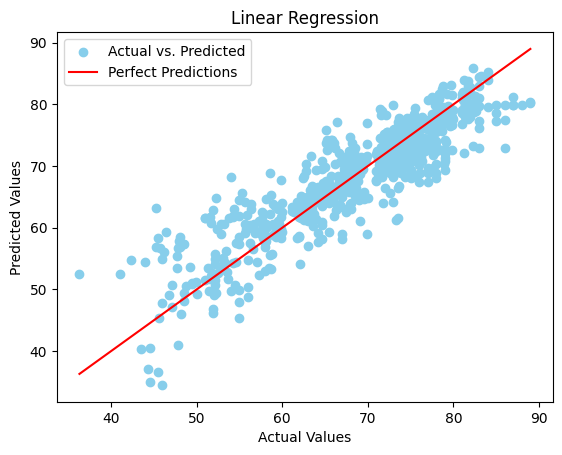

In [20]:
plt.scatter(yval, y_pred, color='skyblue', marker='o', label='Actual vs. Predicted')
plt.plot([min(yval), max(yval)], [min(yval), max(yval)], color='r', label='Perfect Predictions')

plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')

plt.legend()

plt.title('Linear Regression')
plt.show()

It can be seen that the RMSE value of the linear regression is not good enough (4.29). The linear regression model does not have hyperparameters that can be improved, so in the next step, I will use a ridge regression model, where I will try to find some optimal hyperparameters to achieve a more accurate prediction of the explained variable.

### V. Ridge Regression

Using ridge regression is appropriate if there is suspicion of multicollinearity among the explanatory variables. Ridge regression helps normalize ("shrink") the estimates of the coefficients in linear regression. This means that the predicted parameters are pushed toward zero to improve their performance on new data sets. This allows the use of sophisticated models while avoiding overfitting.

In [21]:
import warnings
from sklearn.linear_model import Ridge

warnings.simplefilter(action='ignore', category=RuntimeWarning)

ridge_model = Ridge(1)

ridge_model.fit(Xtrain, ytrain)

y_pred = ridge_model.predict(Xval)

mse = mean_squared_error(yval, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(yval, y_pred)

print(f'Mean Squared Error: {mse:.2f}')
print(f'R-squared Score (R2): {r2:.2f}')
print(f'Root Mean Squared Error (RMSE): {rmse:.2f}')

Mean Squared Error: 18.40
R-squared Score (R2): 0.80
Root Mean Squared Error (RMSE): 4.29


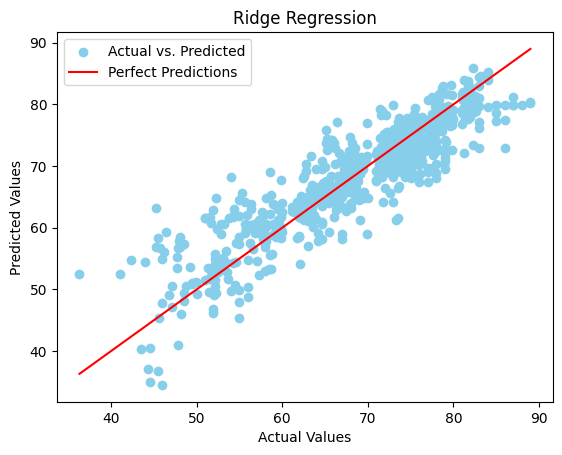

In [22]:
plt.scatter(yval, y_pred, color='skyblue', marker='o', label='Actual vs. Predicted')

plt.plot([min(yval), max(yval)], [min(yval), max(yval)], color='red', label='Perfect Predictions')

plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')

plt.legend()

plt.title('Ridge Regression')
plt.show()

RMSE is the same so far. I will try to find the best hyperparameters using GridSearchCV.

In [23]:
from sklearn.model_selection import GridSearchCV

param_grid = {'alpha': np.linspace(0.1, 100, 100)}

ridge = Ridge()
grid_search_ridge = GridSearchCV(ridge, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search_ridge.fit(Xtrain, ytrain)

# Best hyperparameters
best_alpha_ridge = grid_search_ridge.best_params_['alpha']

# Ridge regression training with the best hyperparameters
ridge_model = Ridge(alpha=best_alpha_ridge)
ridge_model.fit(Xtrain, ytrain)

# Prediction based on validation data
predictions_ridge = ridge_model.predict(Xval)

# Metrics on validation data
mse_ridge = mean_squared_error(yval, predictions_ridge)
rmse_ridge = np.sqrt(mse_ridge)
print(f'Ridge Validation Root Mean Squared Error (RMSE): {rmse_ridge:.2f}')

Ridge Validation Root Mean Squared Error (RMSE): 4.29


In [24]:
from sklearn.model_selection import GridSearchCV
import numpy as np
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import Ridge

param_grid = {'alpha': np.logspace(-3, 3, 100)} 

ridge = Ridge()
grid_search_ridge = GridSearchCV(ridge, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search_ridge.fit(Xtrain, ytrain)

# Best hyperparameters
best_alpha_ridge = grid_search_ridge.best_params_['alpha']

# Training the model with the best hyperparameters
ridge_model = Ridge(alpha=best_alpha_ridge)
ridge_model.fit(Xtrain, ytrain)

# Prediction based on validation data
predictions_ridge = ridge_model.predict(Xval)

# RMSE on validation data
rmse_val = np.sqrt(mean_squared_error(yval, predictions_ridge))

print(f'The best alpha is {best_alpha_ridge} which gives RMSE on the validation set {rmse_val:.2f}')

The best alpha is 2.848035868435802 which gives RMSE on the validation set 4.29


Even after tuning the hyperparameters, I ended up with the same RMSE for both linear and ridge regression. This can be explained by the fact that if the data do not contain strong multicollinearity, or if regularization has no significant effect, ridge regression may perform similarly to linear regression. The final model will be AdaBoost.

### VI. AdaBoost (Regression)

AdaBoost (Adaptive Boosting) is more commonly used for classification tasks rather than regression. However, by adjusting its application, it can be adapted for regression problems as well. In regression, AdaBoost can be useful when it's necessary to combine multiple weak learners (simple models) to build a strong regression model. It gradually adapts to the data by giving more weight to instances that were poorly predicted in previous rounds. This makes AdaBoost suitable for scenarios where the relationships between features and the target variable are complex and may involve nonlinear patterns.

In [25]:
from sklearn.ensemble import AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score
from math import sqrt

# DataFrame to NumPy array conversion
Xtrain_np = np.array(Xtrain)
ytrain_np = np.array(ytrain)
Xval_np = np.array(Xval)
yval_np = np.array(yval)
Xtest_np = np.array(Xtest)
ytest_np = np.array(ytest)

# Creating a weak regression model (usually DecisionTreeRegressor)
weak_regressor = DecisionTreeRegressor(max_depth=3)

# Creating an AdaBoostRegressor
adaboost_regressor = AdaBoostRegressor(estimator=weak_regressor, n_estimators=50, random_state=42)

# Model training
adaboost_regressor.fit(Xtrain_np, ytrain_np)

# Prediction based on validation data
predictions = adaboost_regressor.predict(Xval_np)

# Metrics
mse = mean_squared_error(yval_np, predictions)
rmse = sqrt(mse)
r2 = r2_score(yval_np, predictions)

print(f'Mean Squared Error: {mse:.2f}')
print(f'R-squared Score (R2): {r2:.2f}')
print(f'Root Mean Squared Error (RMSE): {rmse:.2f}')

Mean Squared Error: 10.10
R-squared Score (R2): 0.89
Root Mean Squared Error (RMSE): 3.18


The RMSE on the validation data so far is 3.18. Now I will try to find better hyperparameters to improve it.

In [26]:
from sklearn.model_selection import ParameterGrid
import sklearn.metrics as metrics

param_grid = {
    'n_estimators': range(10, 100, 10),
    'max_depth': range(3,7)
}
Xtrain = np.array(Xtrain, "float64")
Xval = np.array(Xval, "float64")
ytrain = np.array(ytrain, "float64")
yval = np.array(yval, "float64")

param_comb = ParameterGrid(param_grid)

val_metric = []
for params in param_comb:
    dt_depth = params.pop("max_depth")
    params["estimator"] = DecisionTreeRegressor(max_depth = dt_depth)
    dt = AdaBoostRegressor(**params, random_state = 42).fit(Xtrain, ytrain)
    val_metric.append(metrics.mean_squared_error(yval, dt.predict(Xval), squared = False))

best_params = param_comb[np.argmin(val_metric)]
print(f'The best params are {best_params} with validation RMSE {min(val_metric):.2f}.')

/Users/Nelly/Library/Python/3.9/lib/python/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/Users/Nelly/Library/Python/3.9/lib/python/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/Users/Nelly/Library/Python/3.9/lib/python/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/Users/Nelly/Library/Python/3.9/lib/python/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in

The best params are {'n_estimators': 90, 'max_depth': 6} with validation RMSE 2.31.


/Users/Nelly/Library/Python/3.9/lib/python/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


You can see that the parameter is now significantly improved, so I can list the values of other metrics (MSE, R2).

In [27]:
weak_regressor = DecisionTreeRegressor(max_depth=best_params['max_depth'])

adaboost_regressor_best = AdaBoostRegressor(
    estimator=weak_regressor,
    n_estimators=best_params['n_estimators'],  # Use the best n_estimators
    random_state=42
)

adaboost_regressor_best.fit(Xtrain_np, ytrain_np)

predictions_val = adaboost_regressor_best.predict(Xval_np)

mse_val = mean_squared_error(yval_np, predictions_val)

rmse_val = sqrt(mse_val)

r2_val = r2_score(yval_np, predictions_val)

print(f'Validation Mean Squared Error: {mse_val:.2f}')
print(f'Validation R-squared Score (R2): {r2_val:.2f}')
print(f'Validation Root Mean Squared Error (RMSE): {rmse_val:.2f}')

Validation Mean Squared Error: 5.33
Validation R-squared Score (R2): 0.94
Validation Root Mean Squared Error (RMSE): 2.31


### VII. Final model selection and prediction

Overall, it turned out that my best model is AdaBoost (RMSE 2.24). Now I will test what accuracy can be expected on data that the model has not seen before. For this, I will use the test dataset.

In [28]:
from sklearn.ensemble import AdaBoostRegressor

best_adaboost = AdaBoostRegressor(
    estimator=DecisionTreeRegressor(max_depth=6),
    n_estimators=90,
    random_state=42
)

best_adaboost.fit(Xtrain_np, ytrain_np)

y_pred_test_adaboost = best_adaboost.predict(Xtest)

mse_test_adaboost = mean_squared_error(ytest, y_pred_test_adaboost)
rmse_test_adaboost = np.sqrt(mse_test_adaboost)
r2_test_adaboost = r2_score(ytest, y_pred_test_adaboost)

print("Metrics for AdaBoost on the Test Set:")
print(f'Mean Squared Error: {mse_test_adaboost:.2f}')
print(f'R-squared Score (R2): {r2_test_adaboost:.2f}')
print(f'Root Mean Squared Error (RMSE): {rmse_test_adaboost:.2f}')

Metrics for AdaBoost on the Test Set:
Mean Squared Error: 4.39
R-squared Score (R2): 0.95
Root Mean Squared Error (RMSE): 2.10


This resulting model is now applicable to predict the "Life expectancy" attribute.

In [29]:
# Selecting elements from the ecountries dataset
X_ecountries = ecountries.drop(['Country'], axis=1)

# Making predictions based on the ecountries dataset
y_pred_ecountries = best_adaboost.predict(X_ecountries)

# Adding forecasts to the ecountries dataset
ecountries['Predicted_Life_Expectancy'] = y_pred_ecountries

# Create a DataFrame with columns "Country", "Year" and "Predicted_Life_Expectancy"
results_df = ecountries[['Country', 'Year', 'Predicted_Life_Expectancy']]

# Rename the column "Predicted_Life_Expectancy" to "Life expectancy"
results_df = results_df.rename(columns={'Predicted_Life_Expectancy': 'Life expectancy'})

# Save DataFrame to CSV file
results_df.to_csv('results.csv', index=False)

# Display the first few rows of the DataFrame result
print(results_df.head())

      Country  Year  Life expectancy
0  Azerbaijan  2015        74.946241
1  Azerbaijan  2014        74.621552
2  Azerbaijan  2013        74.249580
3  Azerbaijan  2012        74.648447
4  Azerbaijan  2011        74.451020


### VIII. Conclusion

I performed an analysis of the WHO dataset (data.csv) with the goal of predicting life expectancy in various countries (and years) based on several features. A total of four regression models were created, and the one with the best hyperparameters—AdaBoost—was identified. Based on this model, a final prediction was made using the evaluation.csv dataset. The results were saved to results.csv.